# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

In [3]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

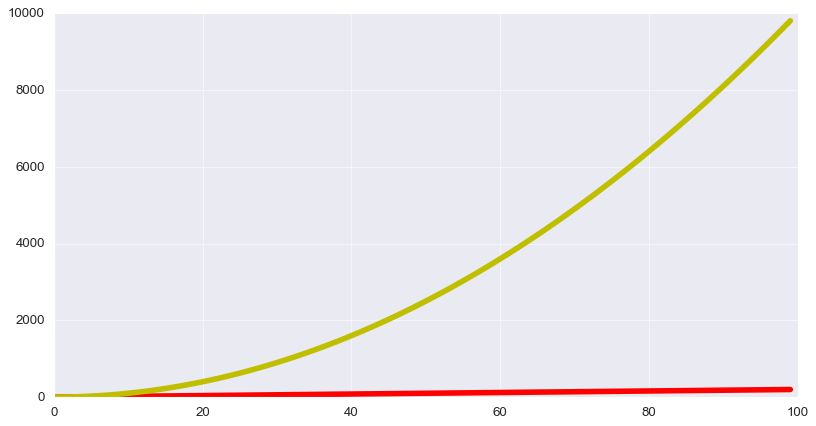

In [39]:
# Method 1

# create first figure and ax
fig,ax = plt.subplots() # here we define the size

# we plot the different lines adding them to the axis
ax.plot(x,y,linewidth=5.0,c='r')
ax.plot(x,z,linewidth=5.0,c='y')

plt.savefig('chart.png')

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

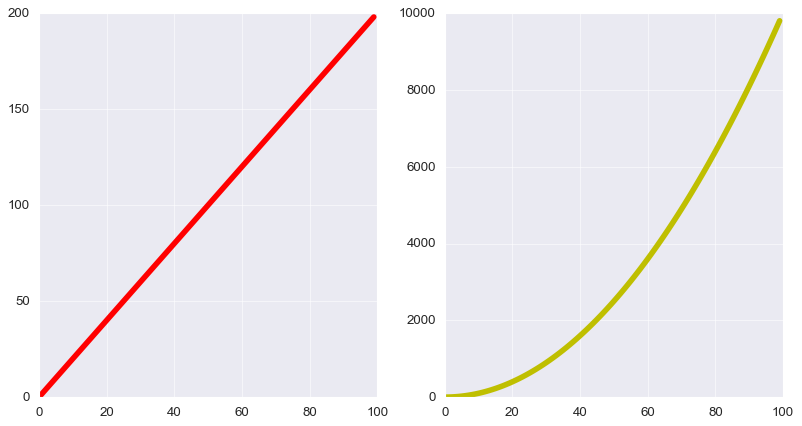

In [40]:
# Method 2

# create first figure and ax
fig2,ax2 = plt.subplots(1,2)

# we plot the different lines adding them to the axis
ax2[0].plot(x,y,linewidth=5.0,c='r')
ax2[1].plot(x,z,linewidth=5.0,c='y')


plt.savefig('chart2.png')

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

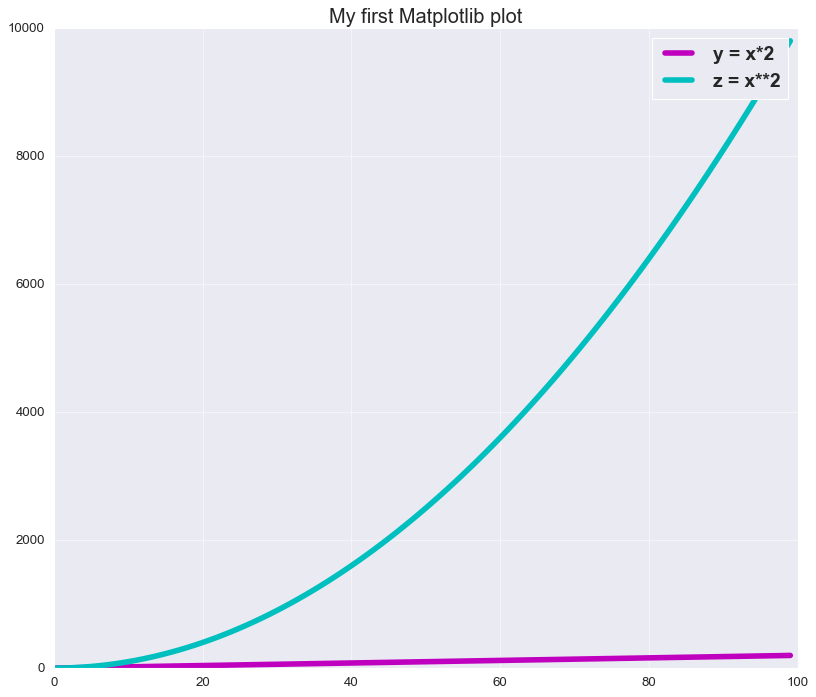

In [41]:
# create first figure and ax
fig,ax = plt.subplots(figsize = (12,10)) # here we define the size

# we add a title to the figure or the ax
ax.set_title('My first Matplotlib plot', fontsize=18)

# we plot the different lines adding them to the axis
ax.plot(x, y , label='y = x*2', c='m',linewidth=5.0)
ax.plot(x, z , label='z = x**2', c='c',linewidth=5.0)

# we add the legend and change the style
ax.legend()

# legend properties
style_1 = {'weight':'bold'}
style_2 = {'size':'x-large', 'weight':'bold'}
ax.legend(prop=style_1)
ax.legend(prop=style_2)

plt.savefig('chart3.png')

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

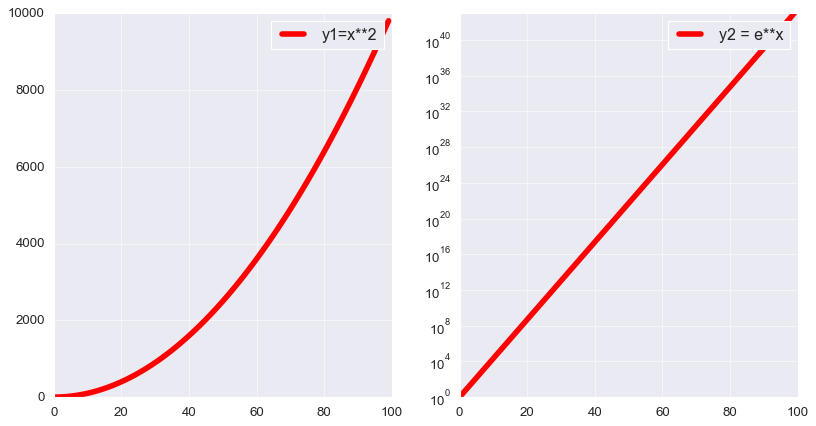

In [42]:
# your code here

y1=x**2
y2= np.exp(x)

#y2 = e**x

#log(y2)=x

# create first figure and ax
fig3,ax3 = plt.subplots(1,2)


# we plot the different lines adding them to the axis
ax3[0].plot(x,y1,label='y1=x**2',linewidth=5.0,c='r')
ax3[1].plot(x,y2,label='y2 = e**x',linewidth=5.0,c='r')

ax3[1].set_yscale('log')

ax3[0].legend()
ax3[1].legend()


plt.savefig('chart4.png')



#### As a bonus challenge, try to add a legend to the plot.

In [8]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [9]:
fitbit = pd.read_csv(r'..\data\Fitbit2.csv')

fitbit.head()


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

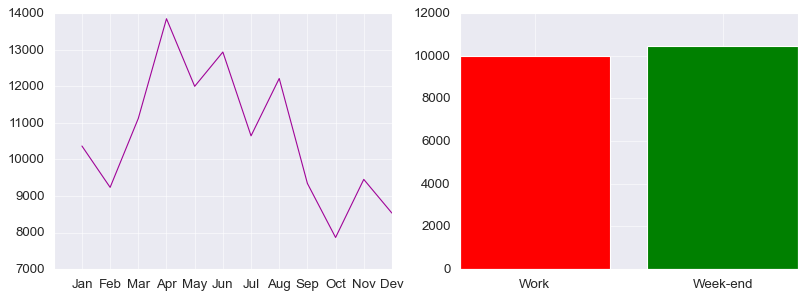

In [43]:
months = ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dev']
week_work = ['Work','Week-end']

steps_by_month = fitbit.groupby('Months_encoded')['Steps'].median()
steps_by_day =  fitbit.groupby('Work_or_Weekend')['Steps'].median()

# Start with the usual matplotlib subplots() function
fig5, ax5 = plt.subplots(1,2, figsize = (12,4) )

plt.sca(ax5[0])
ax5[0].plot(steps_by_month.index, steps_by_month, c = 'xkcd:barney purple')
plt.xticks(range(13),months)

plt.sca(ax5[1])
ax5[1].bar(x=steps_by_day.index, height = steps_by_day, color = ['r','g'])
plt.xticks(range(2),week_work)


#fig5.set_title("Steps by month")


plt.savefig('chart5.png')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [11]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


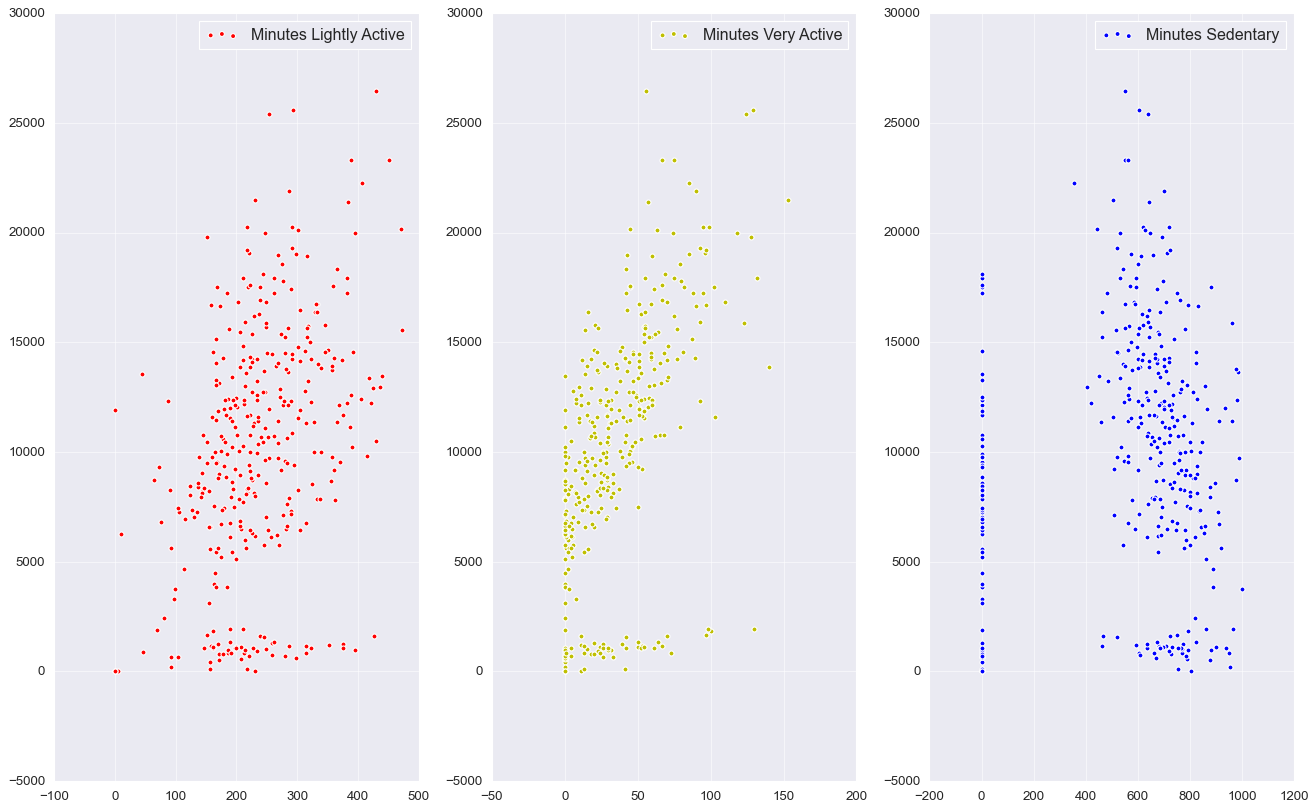

In [44]:
columns = ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']
colores = ['r','y','b']

fig6, ax6 = plt.subplots(1,3, figsize = (20,12) )

for n,elem in enumerate(columns):
    ax6[n].scatter(fitbit[elem],fitbit['Steps'],label=elem,c=colores[n])
    ax6[n].legend()
    
plt.savefig('chart6.png')

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [13]:
titanic = pd.read_csv(r'..\data\titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [14]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [15]:
# NUMERICAL VARIABLES

titanic.select_dtypes(['int64','float64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [16]:
# CATEGORICAL VARIABLES

titanic.select_dtypes(['object'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [17]:
plt.style.use('classic')

plt.rcParams['figure.figsize']=[12.0,6.0]

In [18]:
sns.set_style('darkgrid')

#### Use the right visulalization to show the distribution of column `Age`.

In [19]:
age = titanic['Age'].value_counts()

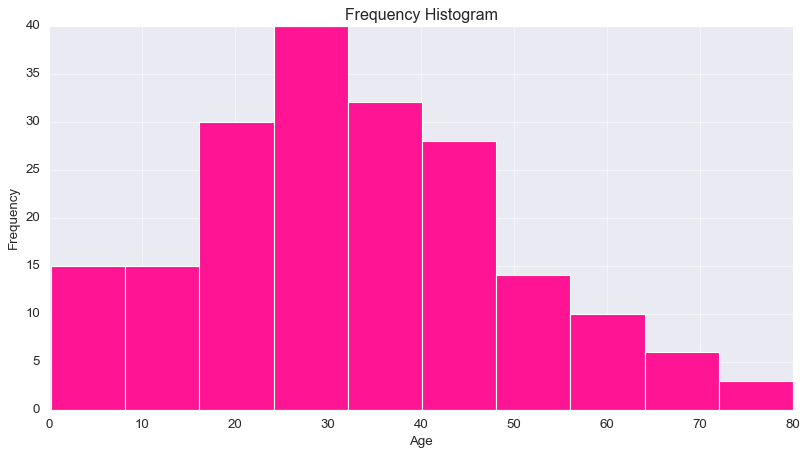

In [45]:
#Histogram

fig_7, ax_7 = plt.subplots()

ax_7.hist(age.index,color="deeppink")

plt.gca().set(title='Frequency Histogram', ylabel='Frequency', xlabel='Age')

plt.savefig('chart7.png')

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

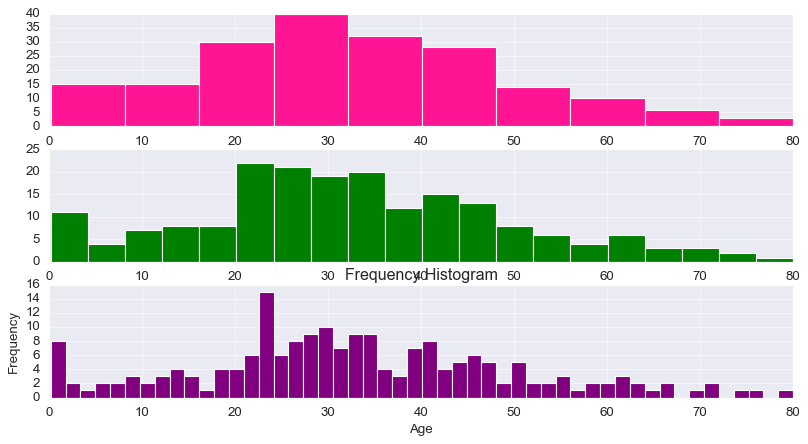

In [46]:
#Histogram

fig_8, ax_8 = plt.subplots(3,1)

ax_8[0].hist(age.index,bins=10,color="deeppink")
ax_8[1].hist(age.index,bins=20,color="green")
ax_8[2].hist(age.index,bins=50,color="purple")

plt.gca().set(title='Frequency Histogram', ylabel='Frequency', xlabel='Age')

plt.savefig('chart8.png')

#### How does the bin size affect your plot?

In [22]:
# More bins gets and histogram more acurate and more visual

#### Use seaborn to show the distribution of column `Age`.

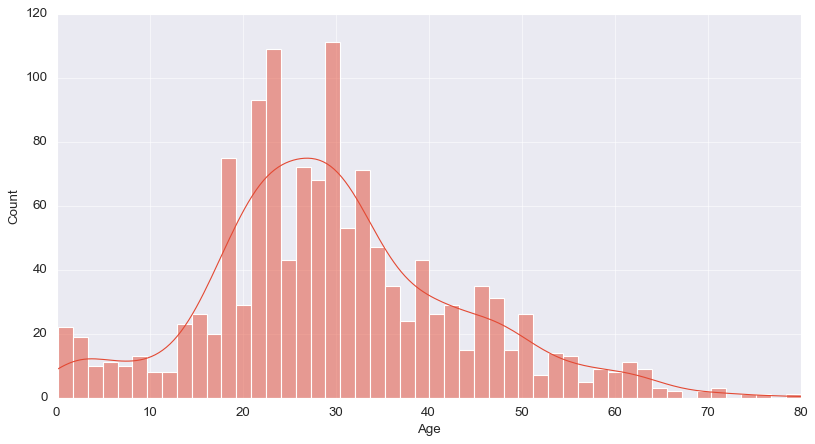

In [47]:
sns.histplot(data=titanic,x='Age', bins=50, kde=True)
plt.savefig('chart9.png')

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

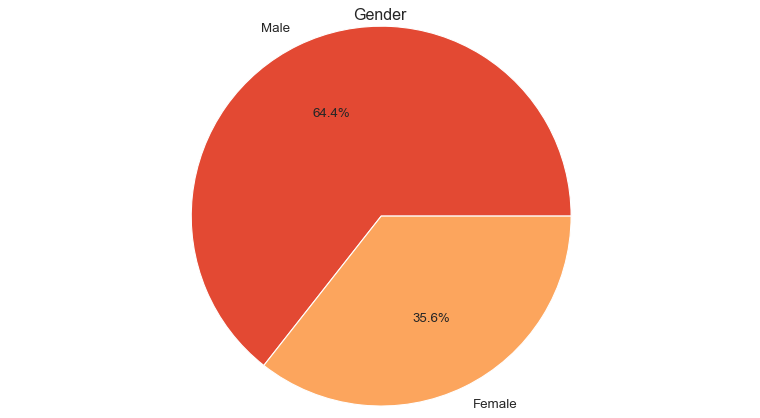

In [49]:
# Method 1 - matplotlib

sns.set_palette('RdYlGn')
palette_gender = {"female": "C5", "male": "C0"}

gender = titanic['Gender'].value_counts()

genders = ['Male','Female']

plt.pie(gender,labels=genders,autopct='%1.1f%%')
plt.title('Gender')
plt.axis('equal')

plt.savefig('chart10.png')

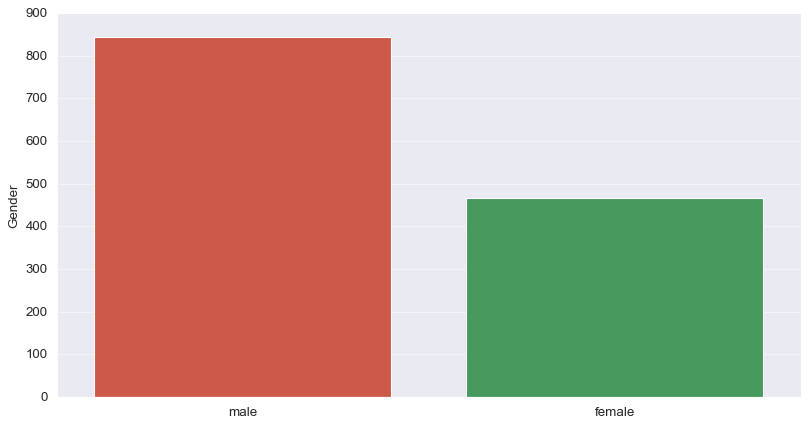

In [50]:
# Method 2 - seaborn

sns.set_palette('RdYlGn')
palette_gender = {"female": "C5", "male": "C0"}

sns.barplot(x=gender.index,y=gender,palette=palette_gender)

plt.savefig('chart11.png')

#### Use the right plot to visualize the column `Pclass`.

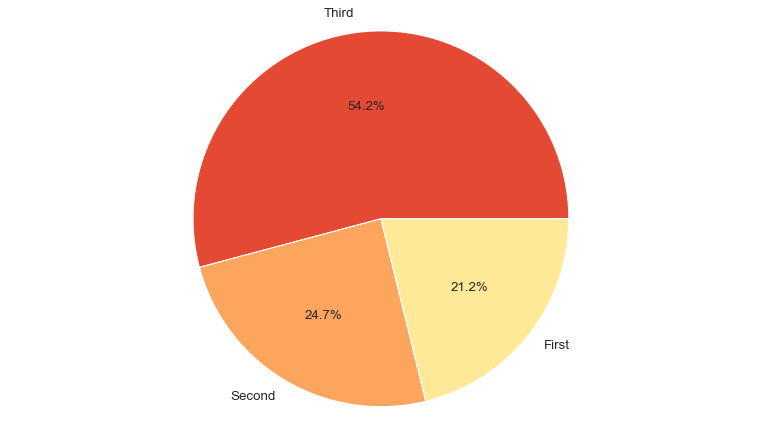

In [51]:
pclass = titanic['Pclass'].value_counts()
classes = ["Third","Second","First"]

sns.set_palette('RdYlGn')

plt.pie(pclass,labels=classes,autopct='%1.1f%%')
plt.axis('equal')

plt.savefig('chart12.png')

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

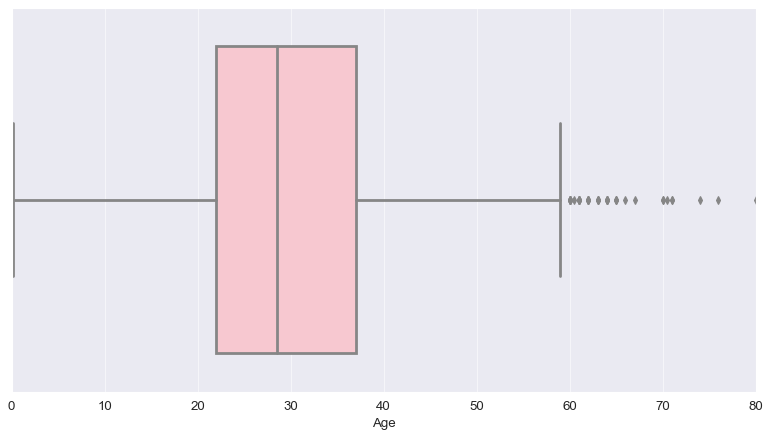

In [52]:
ax = sns.boxplot(x=titanic["Age"],color='pink',linewidth=2.5)
plt.savefig('chart13.png')

In [28]:
#We use bloxpot to see the mean distribution and the outliers.

#### What does the last plot tell you about the feature `Age`?

In [29]:
#The age average is 30 years old aprox but there are some outliers aged over sixty

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

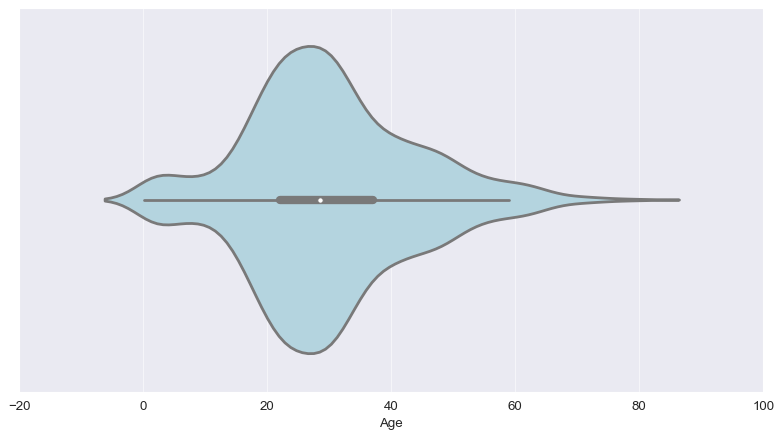

In [53]:
sns.violinplot(x=titanic["Age"],color='lightblue',linewidth=2.5)
plt.savefig('chart14.png')

#### What additional information does the last plot provide about feature `Age`?

In [31]:
#We can have a better understanding of the distribution as we can observe peaks, valleys, and tails of each group’s density curve.

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

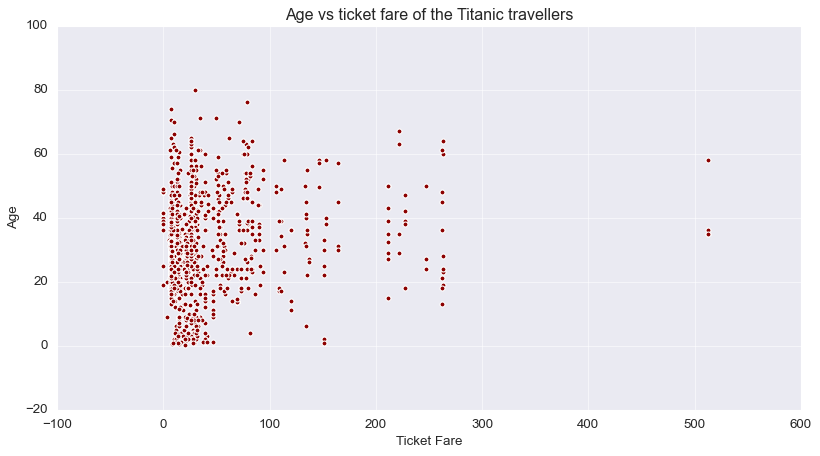

In [54]:
# Method 1 - matplotlib

plt.scatter(x='Fare',y='Age',data=titanic,c='darkred',alpha=1)
plt.gca().set(title='Age vs ticket fare of the Titanic travellers', ylabel='Age', xlabel='Ticket Fare')
plt.savefig('chart15.png')

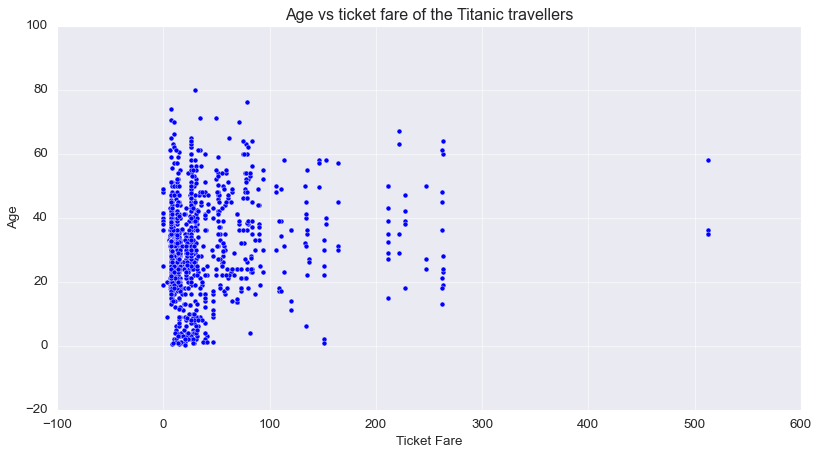

In [56]:
# Method 2 - seaborn

sns.scatterplot(x=titanic['Fare'], y=titanic['Age'], legend='auto')
plt.gca().set(title='Age vs ticket fare of the Titanic travellers', ylabel='Age', xlabel='Ticket Fare')
plt.savefig('chart16.png')

#### Plot the correlation matrix using seaborn.

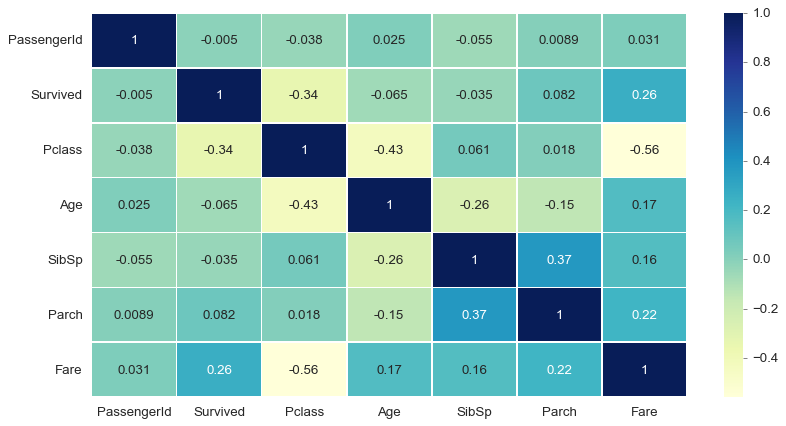

In [57]:
num = titanic.select_dtypes(exclude='object')

num

sns.heatmap(num.corr(),annot=True,cmap="YlGnBu", linewidths=.5)
plt.savefig('chart17.png')

#### What are the most correlated features?

In [35]:
#The most correlated feateures are those either in yellow (i.e. Pclass vs Fare) or dark blue (i.e. Parch vs SibSp)

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

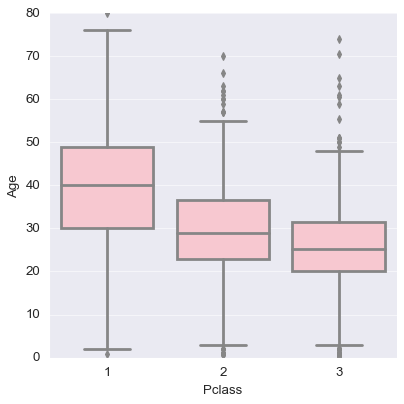

In [58]:
sns.catplot(x='Pclass', y='Age', data = titanic, kind= "box",color='pink',linewidth=2.5)
plt.savefig('chart18.png')

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

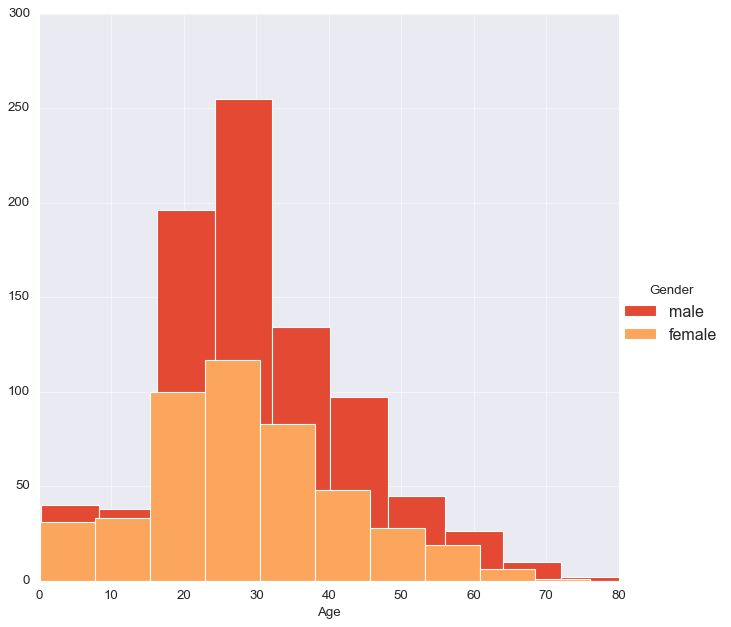

In [61]:
sns.FacetGrid(data=titanic,hue='Gender',height=8).map(plt.hist, 'Age').add_legend()
plt.savefig('chart19.png')